<a href="https://colab.research.google.com/github/Raxmatillo/mohirdev/blob/main/DiabetTashxis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Ma'lumotlarni tayyorlash

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [165]:
# df.info()
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [166]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [167]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [168]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


# MLga tayyorgarlik

In [169]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
X[columns_to_impute] = X[columns_to_impute].replace(0, np.nan)  # 0 ni NaN ga almashtiramiz
X_imputed = imputer.fit_transform(X[columns_to_impute])  # To'ldirish
X[columns_to_impute] = X_imputed

# SMOTE

In [170]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# SMOTE (Oversampling) usuli
smote = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Modelni o'qitish
model_lr.fit(X_train_resampled, y_train_resampled)
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

# Baholash

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score

def score(model_name, y_test, y_pred):
    print(f"{model_name}:\n")
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred):.2f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [177]:
model = RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=42, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=42)

RandomForestClassifier:

Jaccard Score: 0.53
Accuracy: 0.80
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       157
           1       0.68      0.70      0.69        74

    accuracy                           0.80       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.80      0.80      0.80       231

Confusion Matrix:



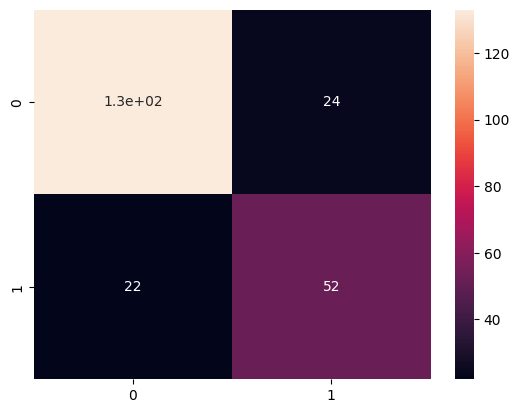

In [185]:
y_pred = model.predict(X_test)
score('RandomForestClassifier', y_test, y_pred)

In [186]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")


Cross-validation scores: [0.75974026 0.74675325 0.74025974 0.82352941 0.73856209]
Mean cross-validation score: 0.76


# Learning Curve

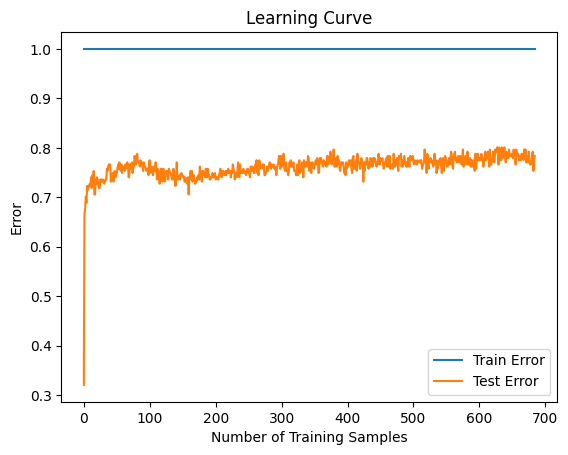

In [199]:

train_errors, test_errors = [], []

for m in range(1, len(X_train_resampled)):
    model.fit(X_train_resampled[:m], y_train_resampled[:m])
    train_errors.append(model.score(X_train_resampled[:m], y_train_resampled[:m]))
    test_errors.append(model.score(X_test, y_test))

plt.plot(train_errors, label="Train Error")
plt.plot(test_errors, label="Test Error")
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Number of Training Samples")
plt.ylabel("Error")
plt.show()


In [200]:
test_score = model.score(X_test, y_test)
print(f'Test Accuracy: {test_score}')

Test Accuracy: 0.7835497835497836


# ROC Curve

Confusion Matrix:
[[131  26]
 [ 24  50]]
ROC AUC: 0.8466173179548976


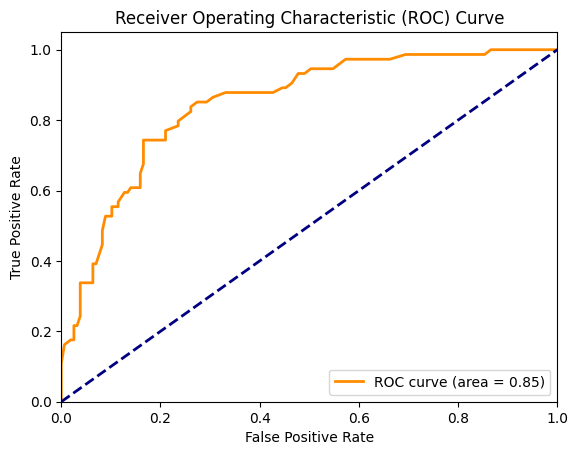

In [196]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

# ROC Curve

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
